In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [14]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [16]:
Y_train

array([7, 2, 5, ..., 0, 9, 9])

In [17]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z>0
    
def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1,db1,dW2,db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2

In [18]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions == Y)/Y.size

def grad_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2
    

In [19]:
W1,b1,W2,b2 = grad_descent(X_train,Y_train,0.10,1000)

Iteration:  0
[7 2 2 ... 2 2 2] [7 2 5 ... 0 9 9]
0.13846341463414635
Iteration:  50
[7 2 3 ... 0 9 9] [7 2 5 ... 0 9 9]
0.5172439024390244
Iteration:  100
[7 2 3 ... 0 9 9] [7 2 5 ... 0 9 9]
0.6181219512195122
Iteration:  150
[7 2 3 ... 0 9 9] [7 2 5 ... 0 9 9]
0.680829268292683
Iteration:  200
[7 2 5 ... 0 9 9] [7 2 5 ... 0 9 9]
0.7370487804878049
Iteration:  250
[7 2 5 ... 0 9 9] [7 2 5 ... 0 9 9]
0.7749756097560976
Iteration:  300
[7 2 5 ... 0 9 9] [7 2 5 ... 0 9 9]
0.8007073170731708
Iteration:  350
[7 2 5 ... 0 9 9] [7 2 5 ... 0 9 9]
0.8185121951219512
Iteration:  400
[7 2 5 ... 0 9 9] [7 2 5 ... 0 9 9]
0.8330975609756097
Iteration:  450
[7 2 5 ... 0 9 9] [7 2 5 ... 0 9 9]
0.8432439024390244
Iteration:  500
[7 2 5 ... 0 9 9] [7 2 5 ... 0 9 9]
0.8515609756097561
Iteration:  550
[7 2 5 ... 0 9 9] [7 2 5 ... 0 9 9]
0.8580975609756097
Iteration:  600
[7 2 5 ... 0 9 9] [7 2 5 ... 0 9 9]
0.8633658536585366
Iteration:  650
[7 2 5 ... 0 9 9] [7 2 5 ... 0 9 9]
0.8674390243902439
Iteration

In [20]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


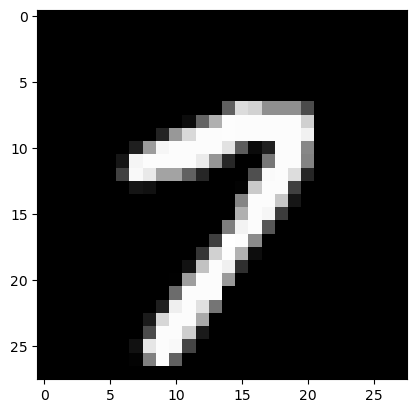

Prediction:  [2]
Label:  2


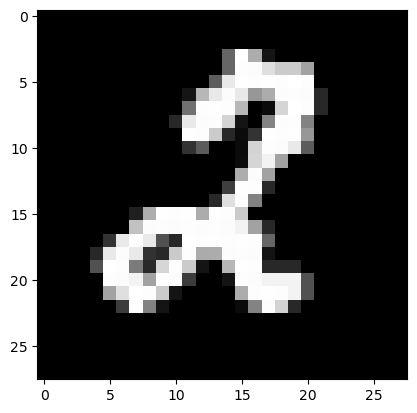

Prediction:  [5]
Label:  5


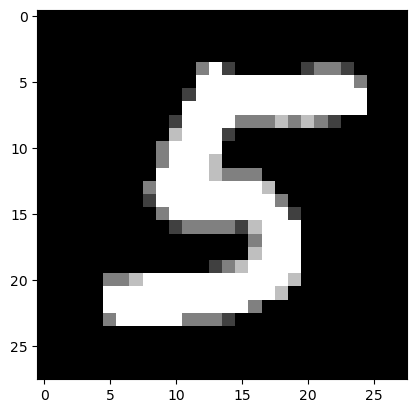

Prediction:  [7]
Label:  7


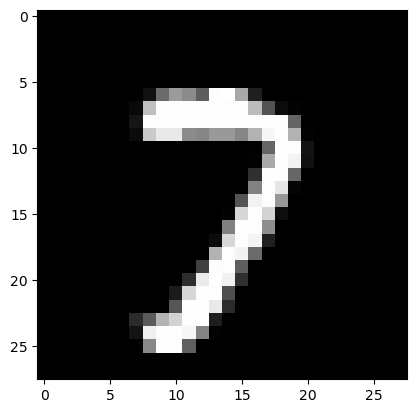

Prediction:  [3]
Label:  3


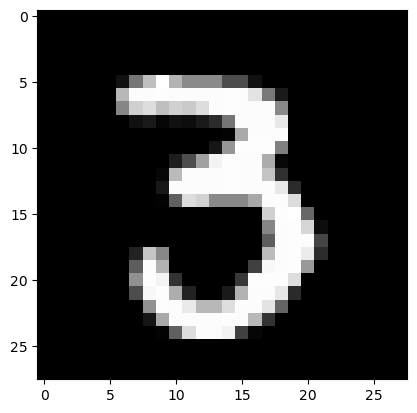

Prediction:  [4]
Label:  4


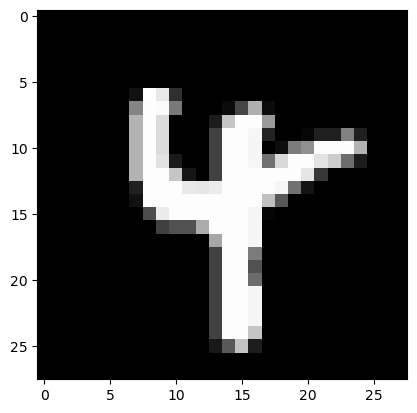

Prediction:  [7]
Label:  7


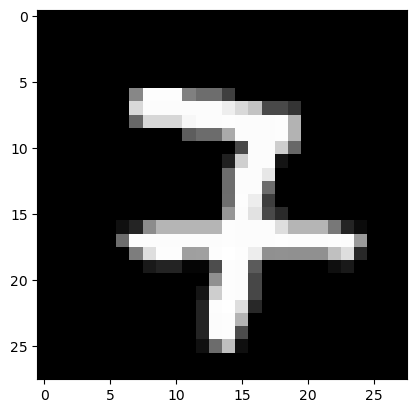

Prediction:  [0]
Label:  0


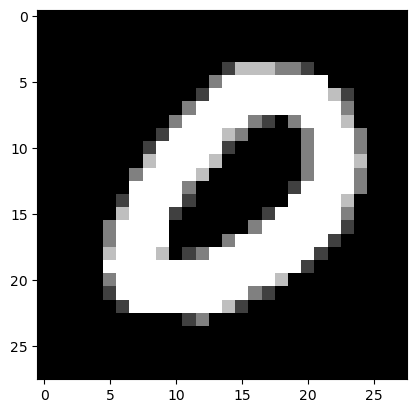

Prediction:  [8]
Label:  8


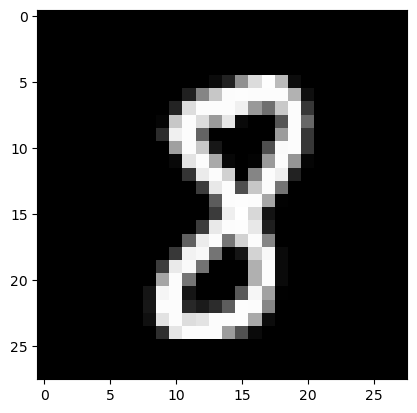

Prediction:  [7]
Label:  7


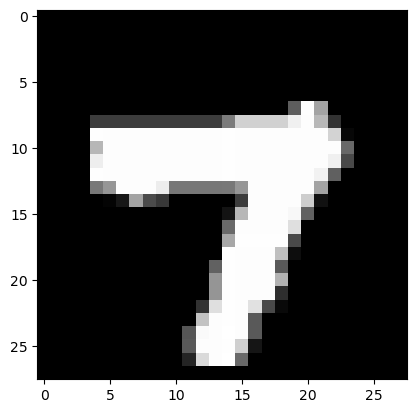

Prediction:  [5]
Label:  5


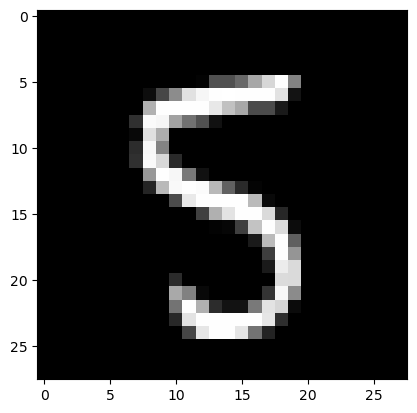

Prediction:  [4]
Label:  4


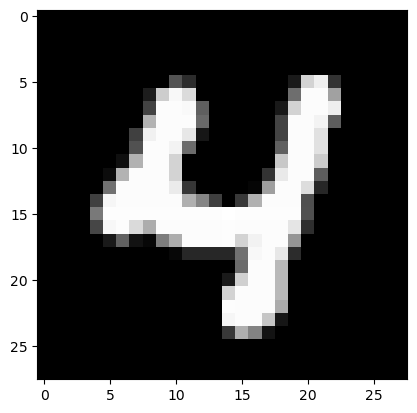

Prediction:  [8]
Label:  8


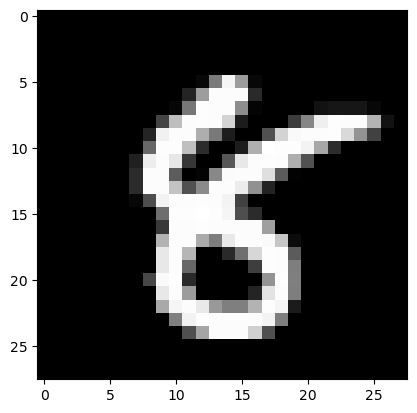

Prediction:  [8]
Label:  8


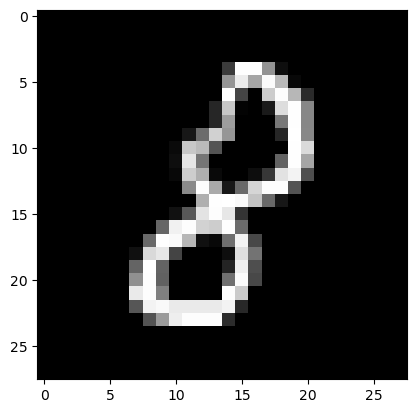

Prediction:  [0]
Label:  0


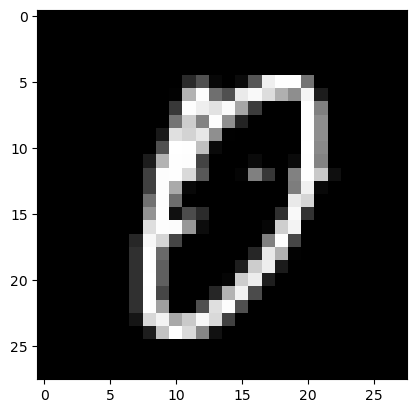

Prediction:  [2]
Label:  2


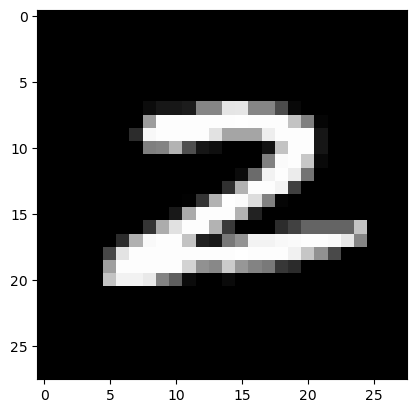

Prediction:  [7]
Label:  8


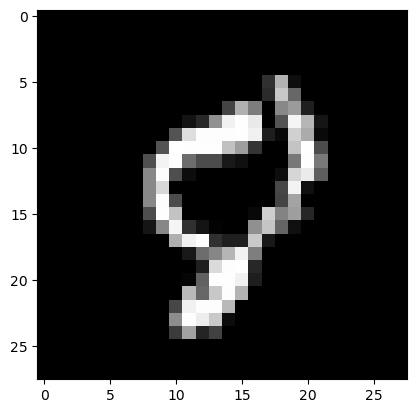

Prediction:  [0]
Label:  0


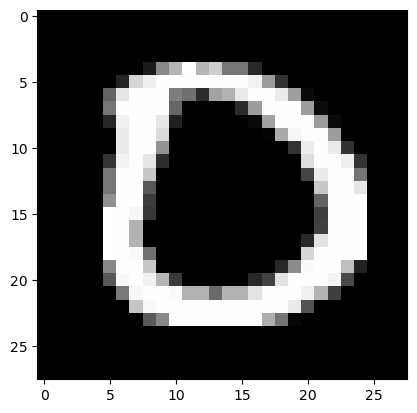

Prediction:  [5]
Label:  5


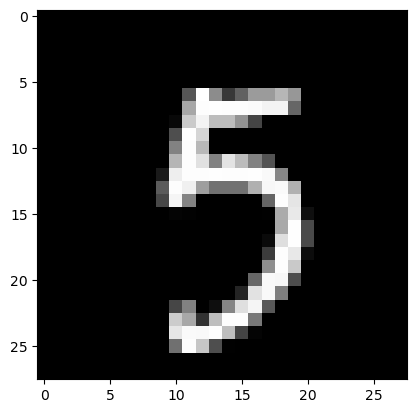

Prediction:  [2]
Label:  2


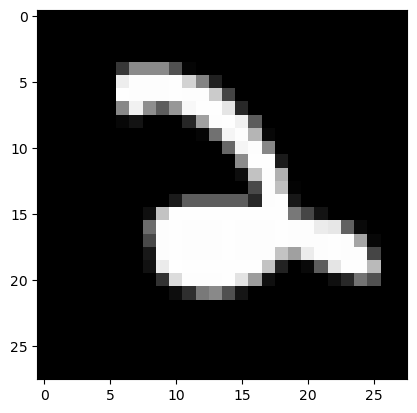

Prediction:  [6]
Label:  6


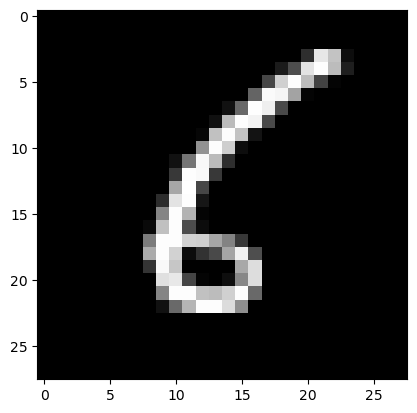

Prediction:  [6]
Label:  6


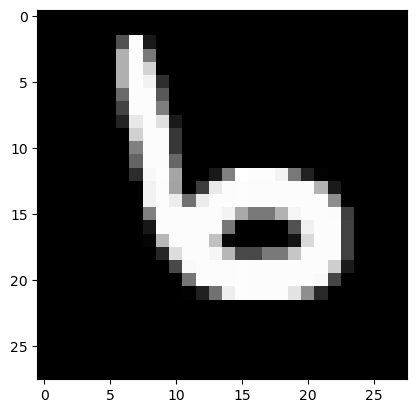

Prediction:  [6]
Label:  6


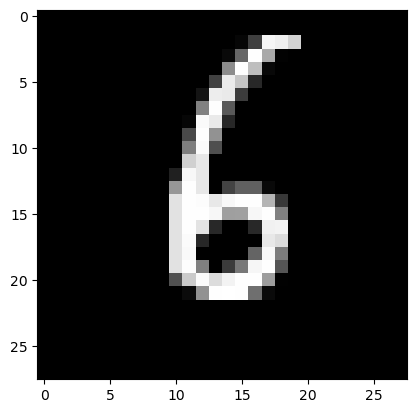

Prediction:  [4]
Label:  4


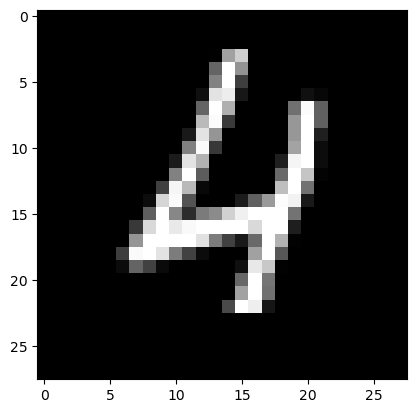

Prediction:  [6]
Label:  4


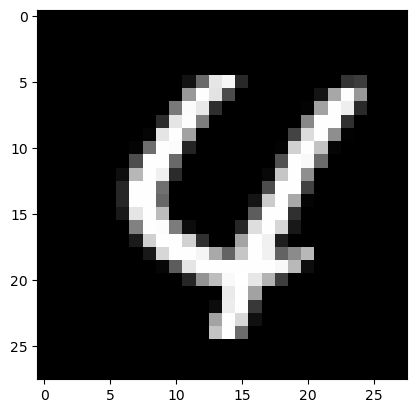

Prediction:  [2]
Label:  2


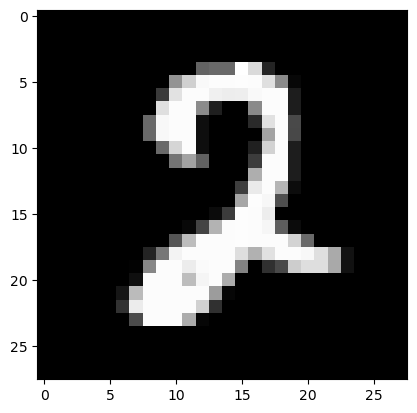

Prediction:  [6]
Label:  6


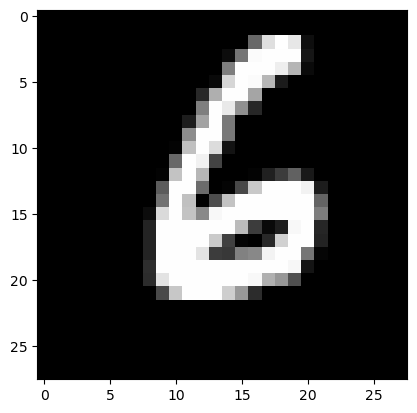

Prediction:  [8]
Label:  1


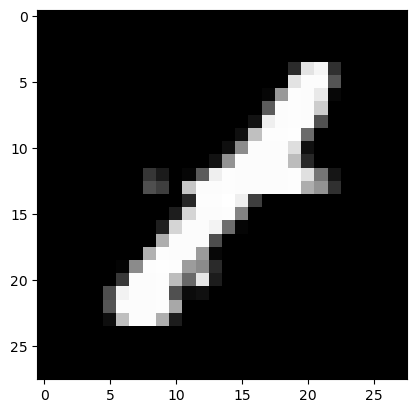

Prediction:  [0]
Label:  0


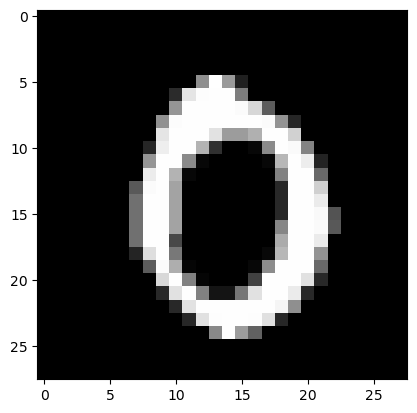

Prediction:  [2]
Label:  2


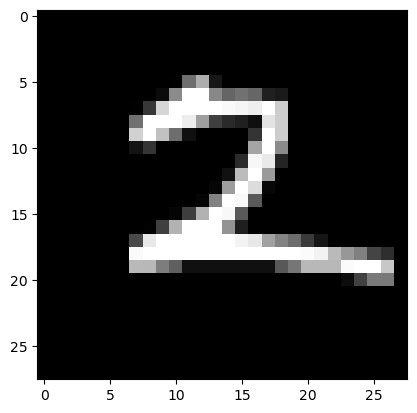

Prediction:  [3]
Label:  3


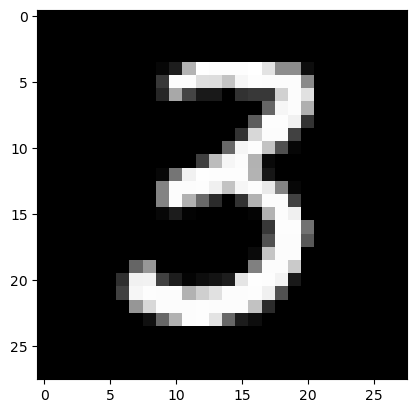

Prediction:  [1]
Label:  1


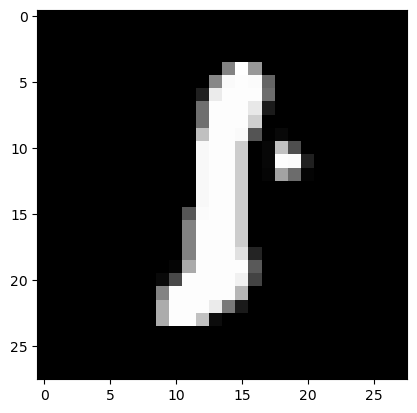

Prediction:  [1]
Label:  1


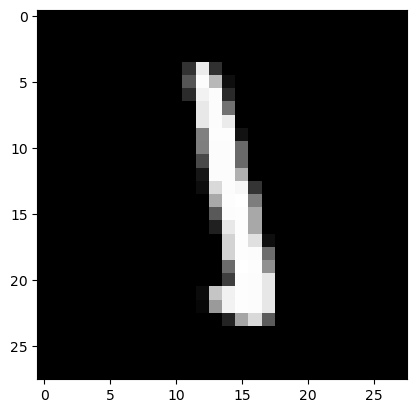

Prediction:  [5]
Label:  5


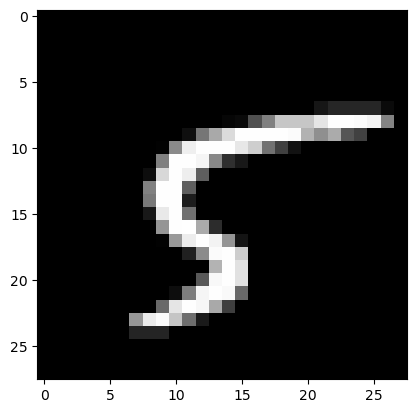

Prediction:  [8]
Label:  4


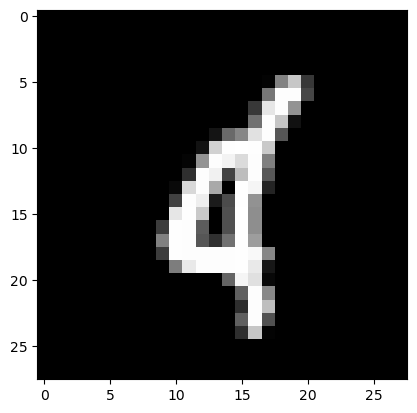

Prediction:  [0]
Label:  9


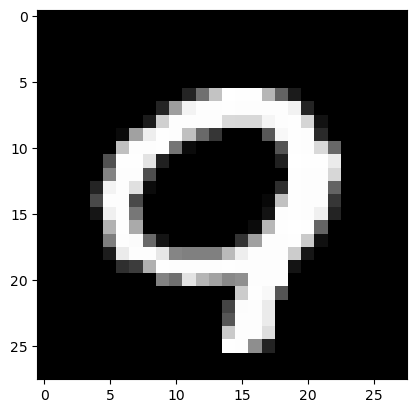

Prediction:  [9]
Label:  9


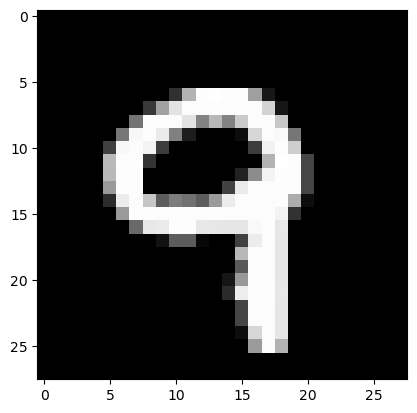

Prediction:  [8]
Label:  1


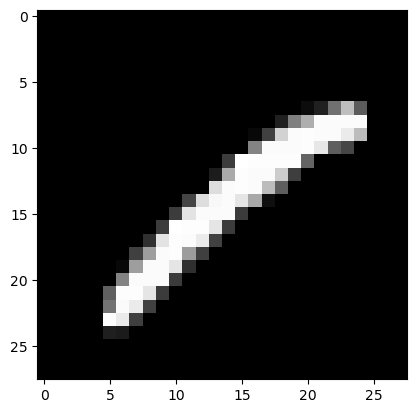

Prediction:  [1]
Label:  1


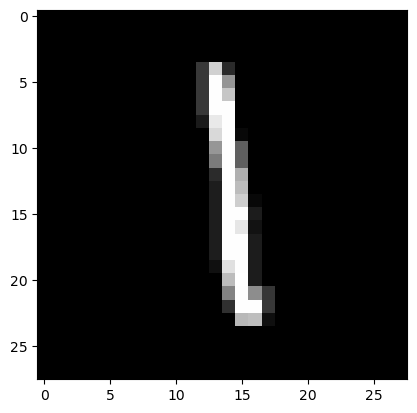

Prediction:  [6]
Label:  6


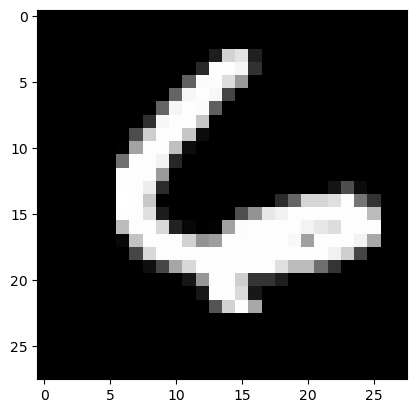

Prediction:  [4]
Label:  9


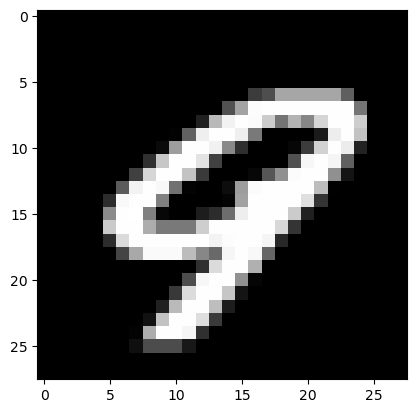

Prediction:  [1]
Label:  1


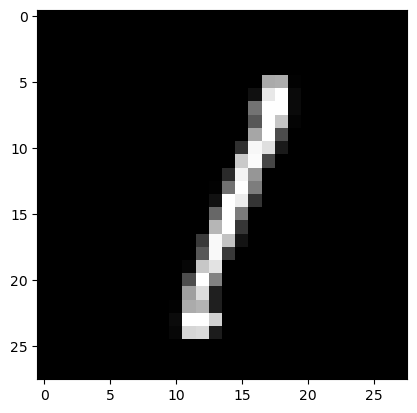

Prediction:  [4]
Label:  9


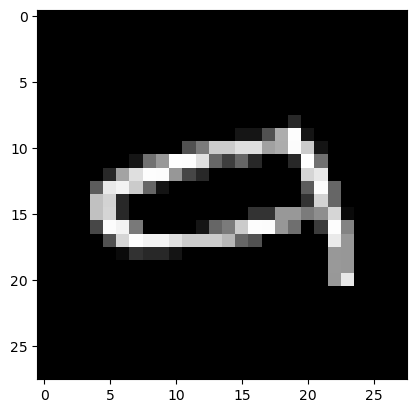

Prediction:  [8]
Label:  8


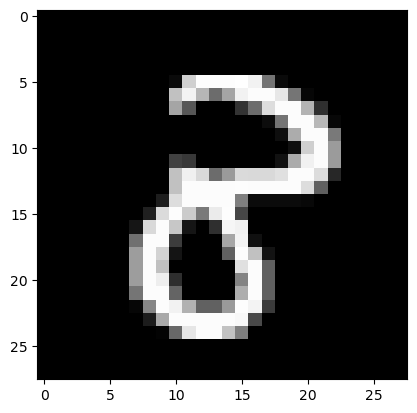

Prediction:  [1]
Label:  1


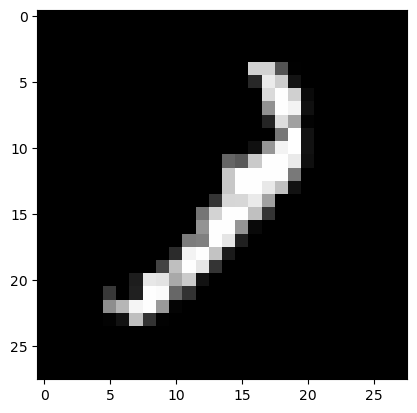

Prediction:  [3]
Label:  3


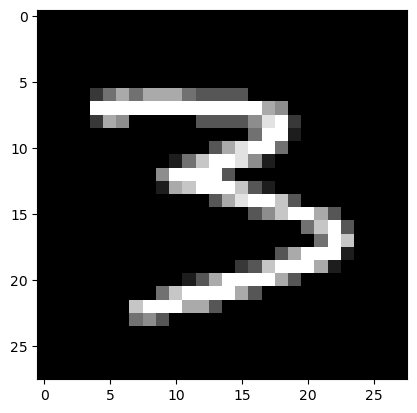

Prediction:  [7]
Label:  7


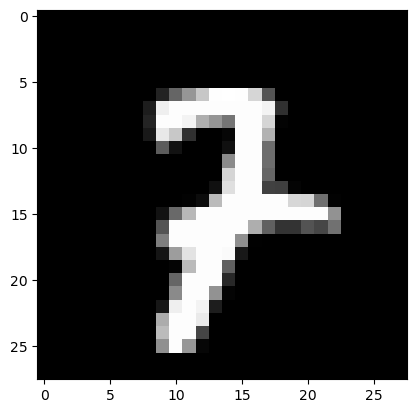

Prediction:  [8]
Label:  8


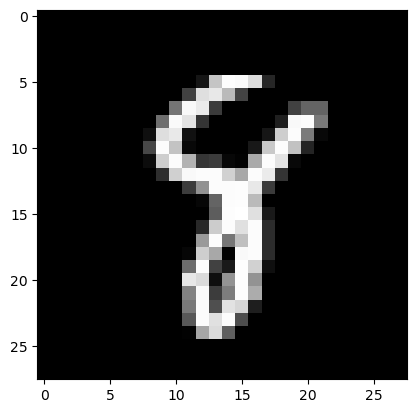

Prediction:  [2]
Label:  6


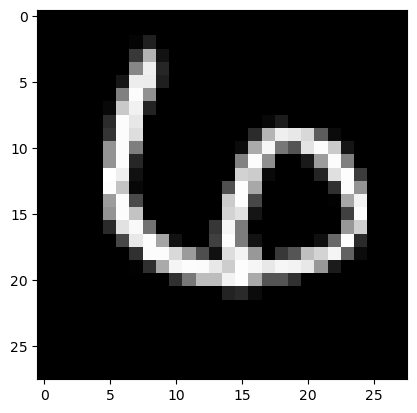

Prediction:  [8]
Label:  8


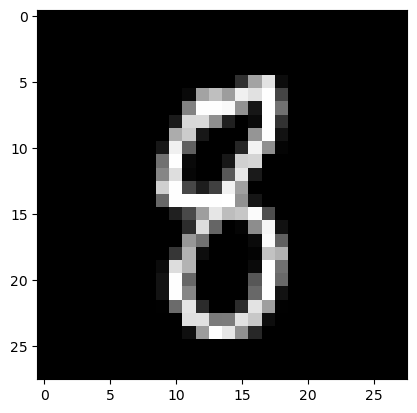

Prediction:  [7]
Label:  9


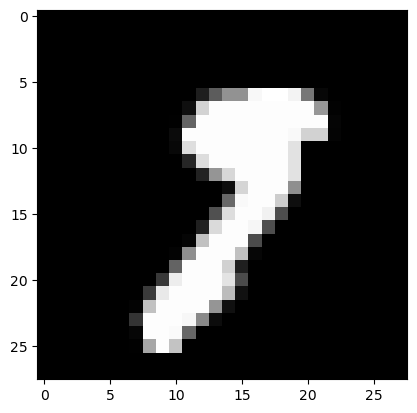

Prediction:  [2]
Label:  2


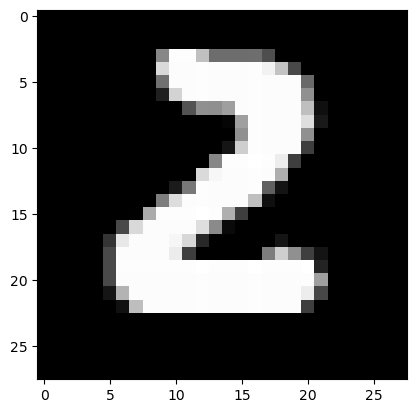

Prediction:  [1]
Label:  1


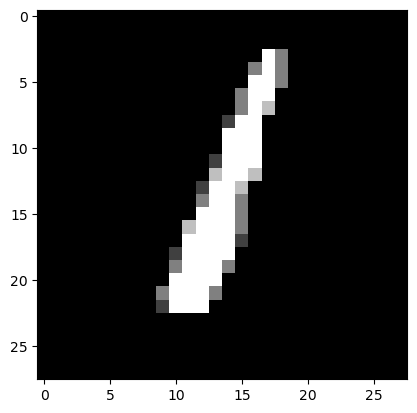

Prediction:  [4]
Label:  4


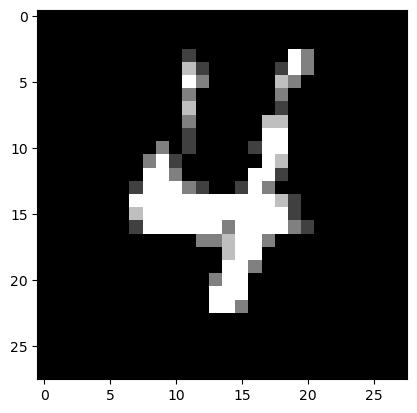

Prediction:  [6]
Label:  6


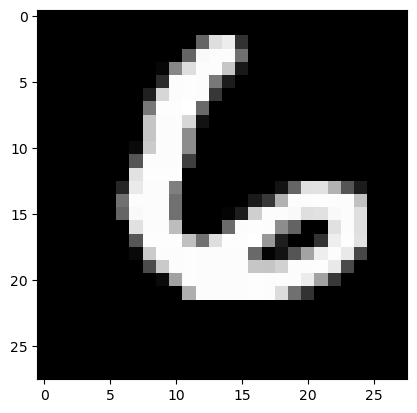

Prediction:  [0]
Label:  0


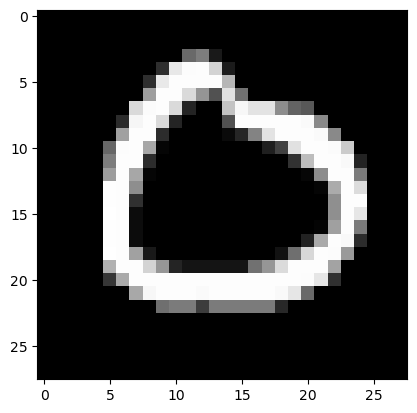

Prediction:  [1]
Label:  1


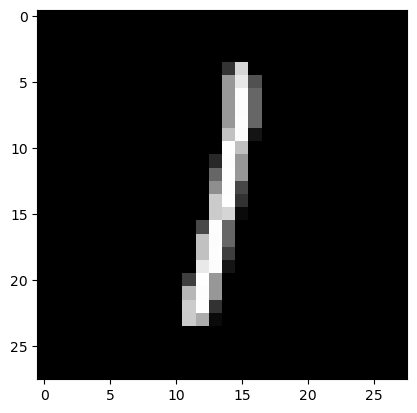

Prediction:  [0]
Label:  0


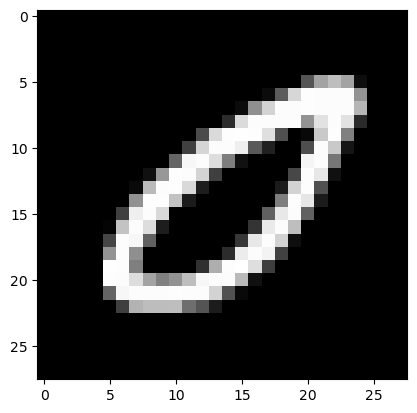

Prediction:  [0]
Label:  0


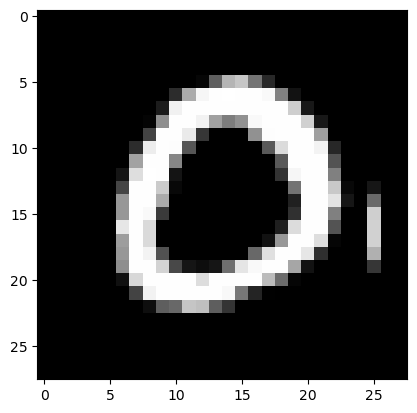

Prediction:  [2]
Label:  2


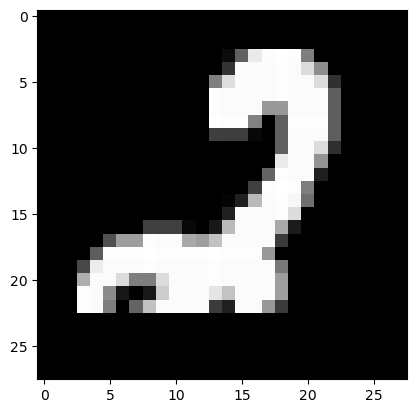

Prediction:  [2]
Label:  2


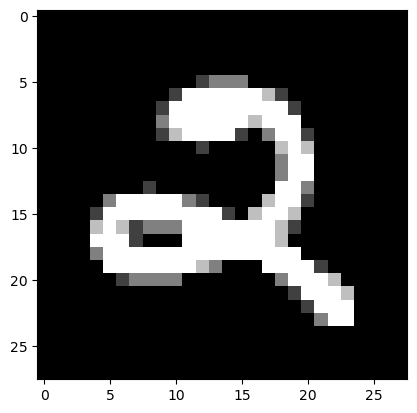

Prediction:  [7]
Label:  7


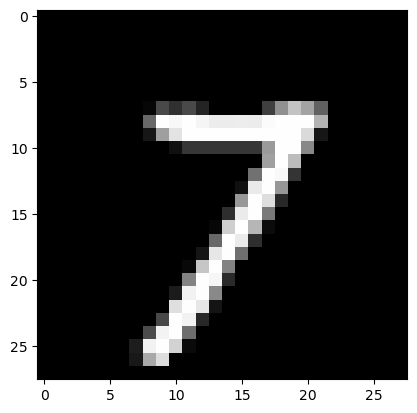

Prediction:  [6]
Label:  6


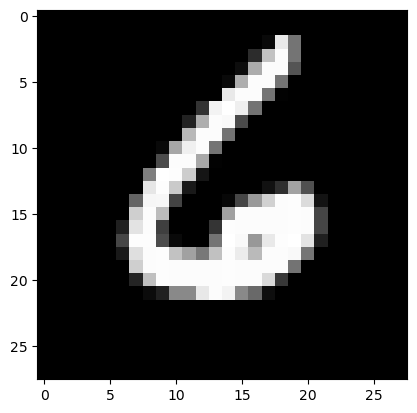

Prediction:  [0]
Label:  0


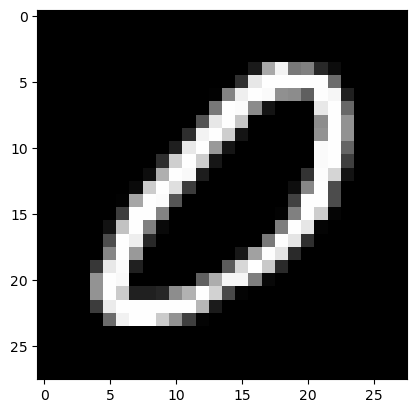

Prediction:  [1]
Label:  7


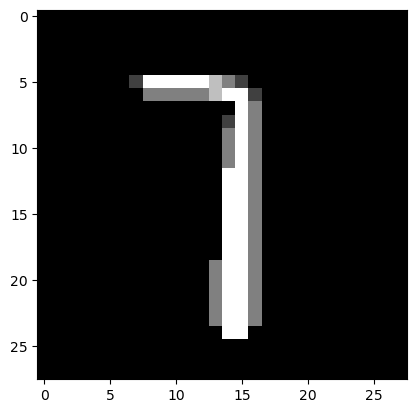

Prediction:  [0]
Label:  0


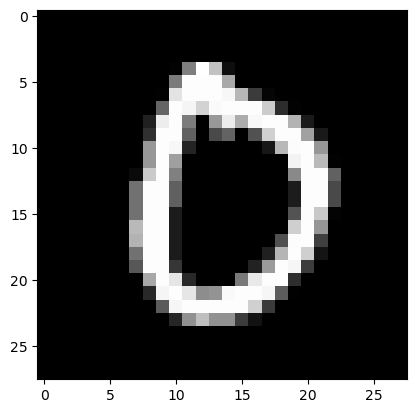

Prediction:  [3]
Label:  3


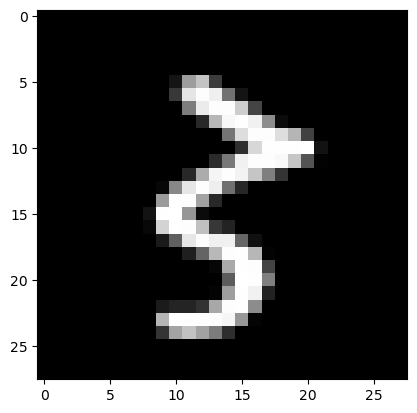

Prediction:  [4]
Label:  4


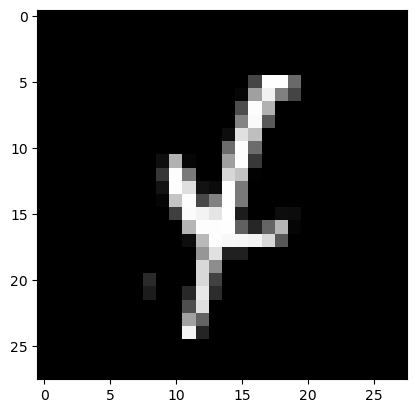

Prediction:  [4]
Label:  4


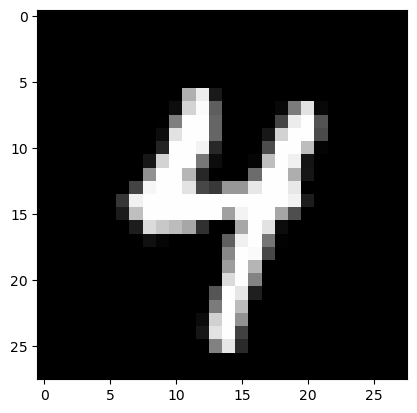

Prediction:  [1]
Label:  1


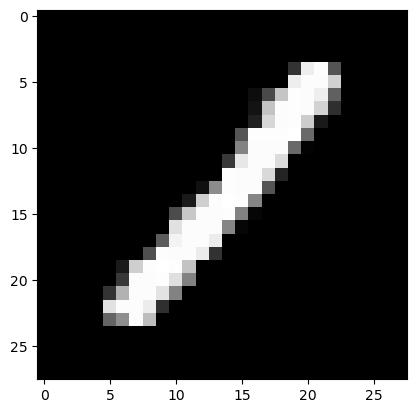

Prediction:  [2]
Label:  2


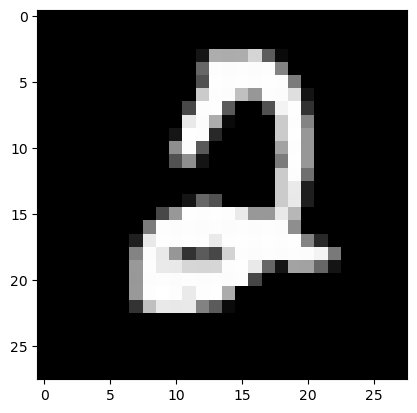

Prediction:  [1]
Label:  1


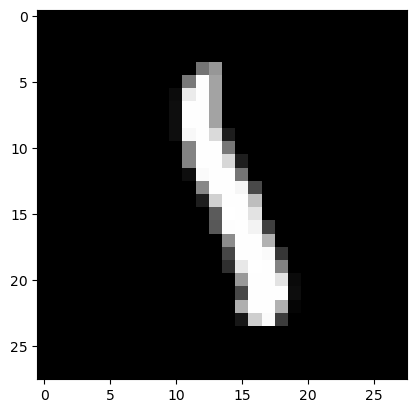

Prediction:  [4]
Label:  4


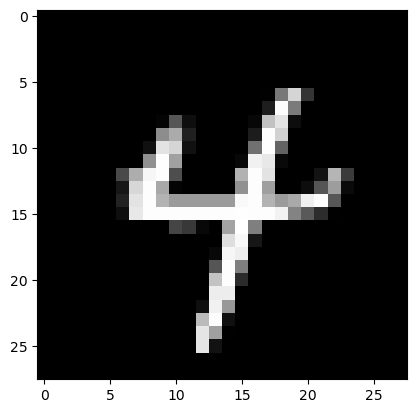

Prediction:  [6]
Label:  6


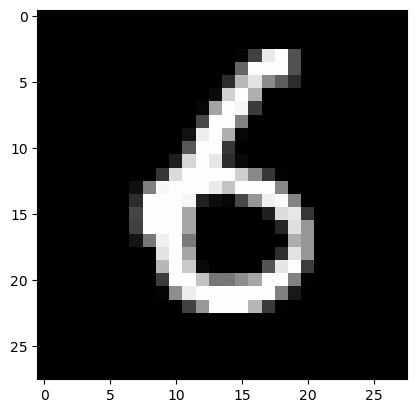

Prediction:  [0]
Label:  0


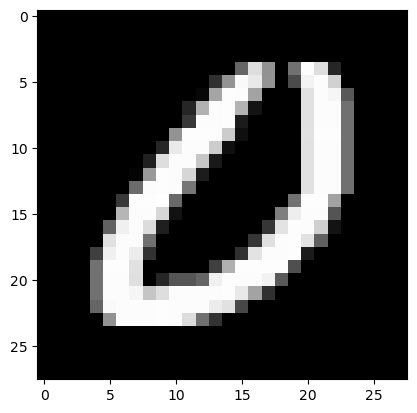

Prediction:  [5]
Label:  5


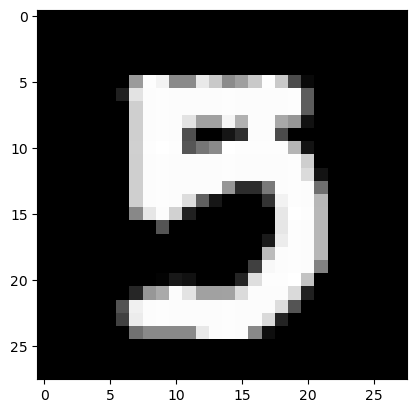

Prediction:  [8]
Label:  8


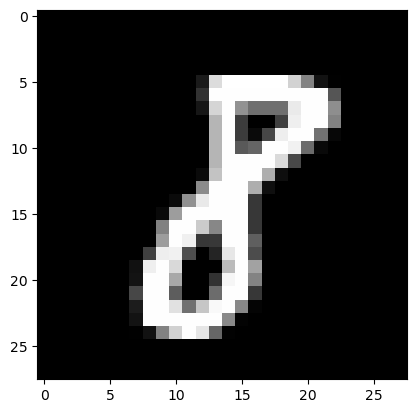

Prediction:  [7]
Label:  7


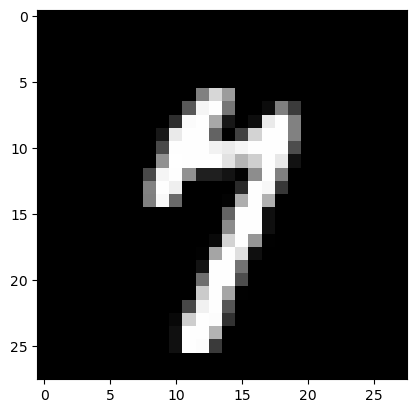

Prediction:  [1]
Label:  1


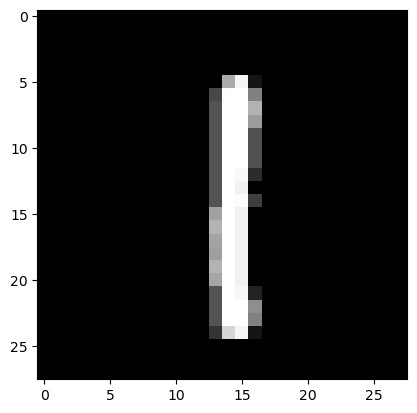

Prediction:  [7]
Label:  7


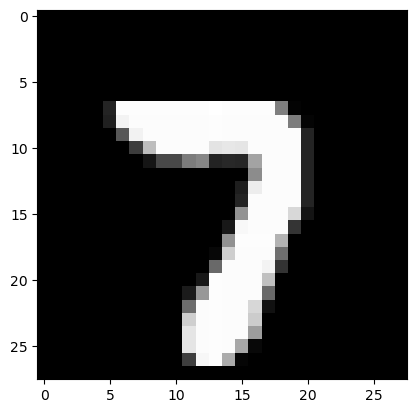

Prediction:  [7]
Label:  7


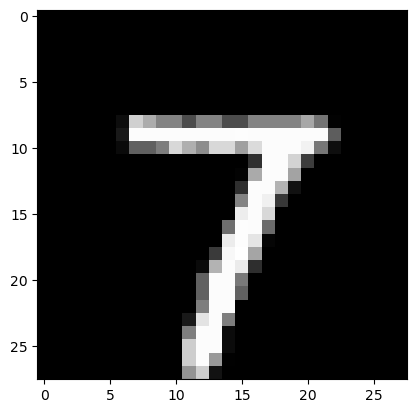

Prediction:  [5]
Label:  5


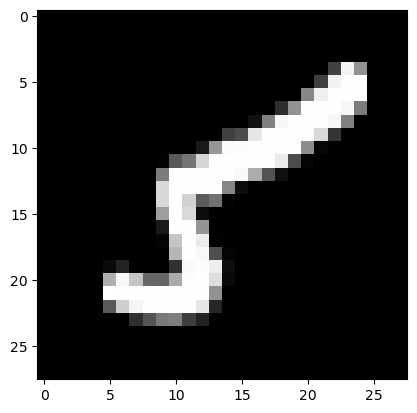

Prediction:  [5]
Label:  8


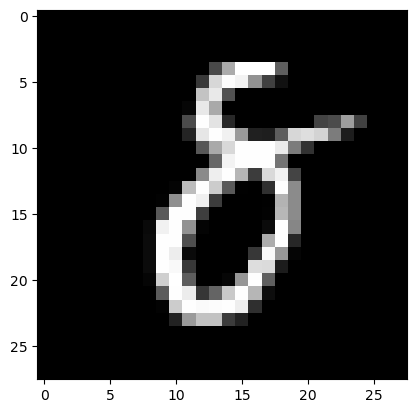

Prediction:  [3]
Label:  3


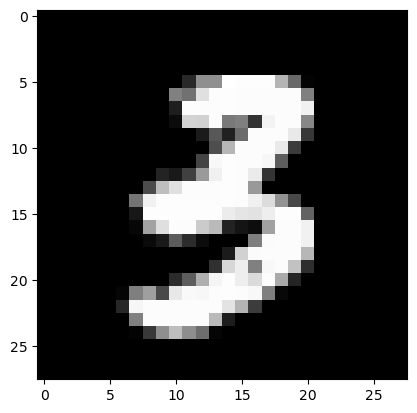

Prediction:  [5]
Label:  5


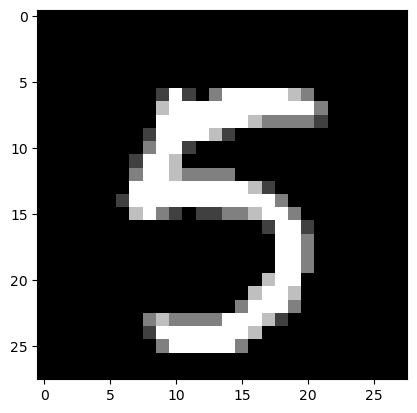

Prediction:  [7]
Label:  7


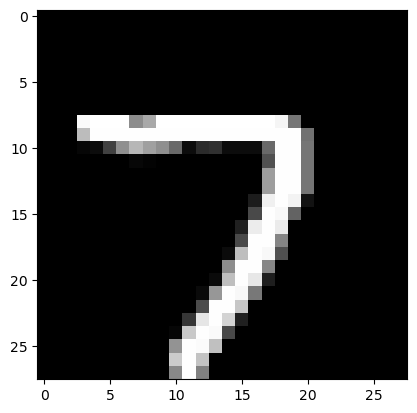

Prediction:  [2]
Label:  3


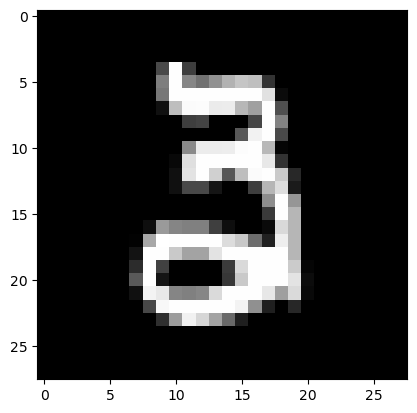

Prediction:  [4]
Label:  4


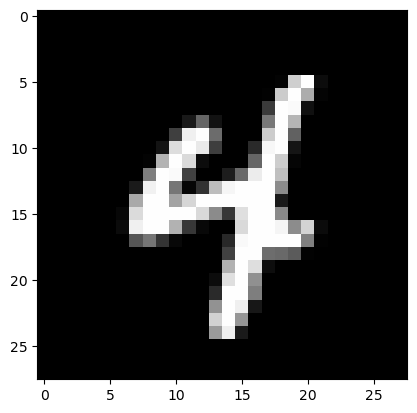

Prediction:  [2]
Label:  2


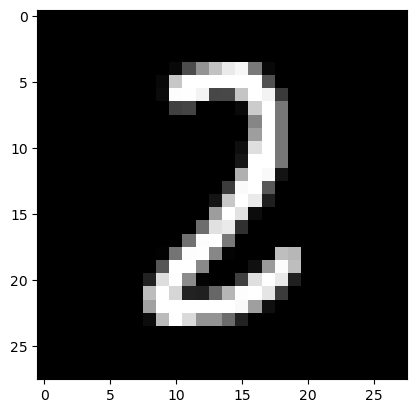

Prediction:  [7]
Label:  7


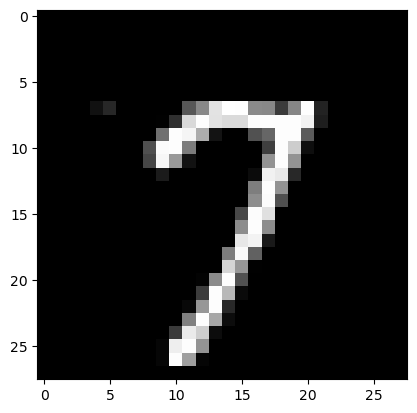

Prediction:  [4]
Label:  4


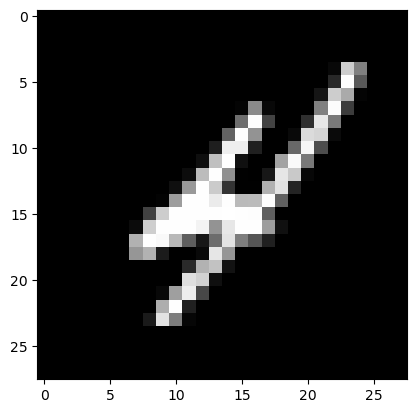

Prediction:  [3]
Label:  3


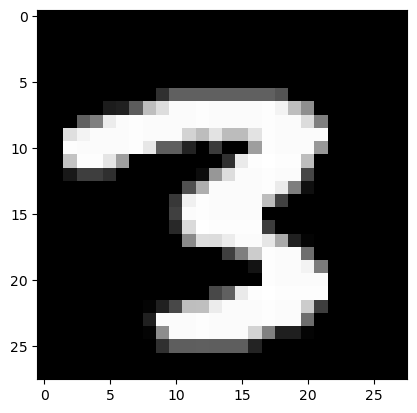

Prediction:  [4]
Label:  4


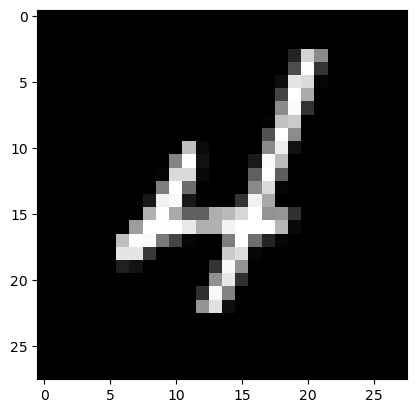

Prediction:  [4]
Label:  4


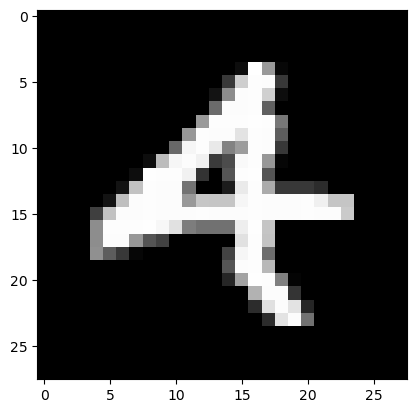

Prediction:  [5]
Label:  8


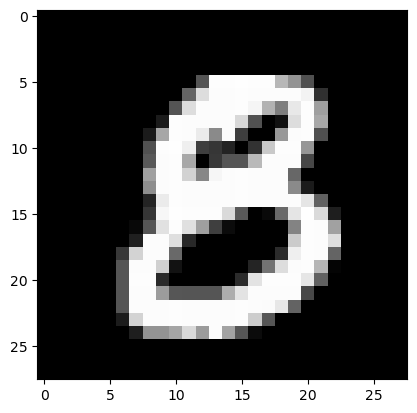

Prediction:  [2]
Label:  2


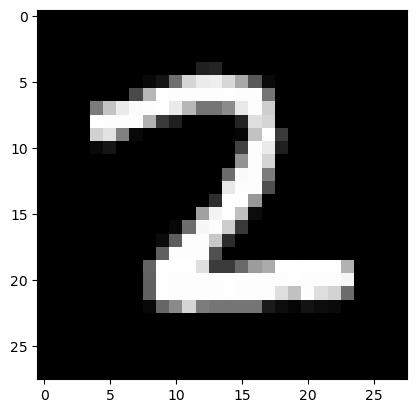

Prediction:  [1]
Label:  1


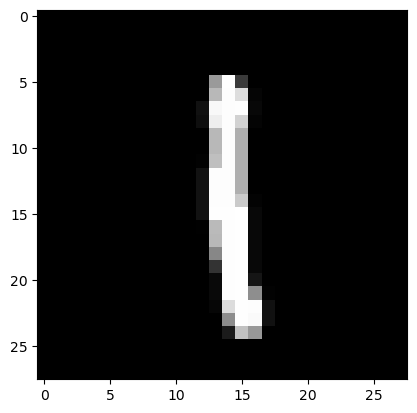

Prediction:  [4]
Label:  4


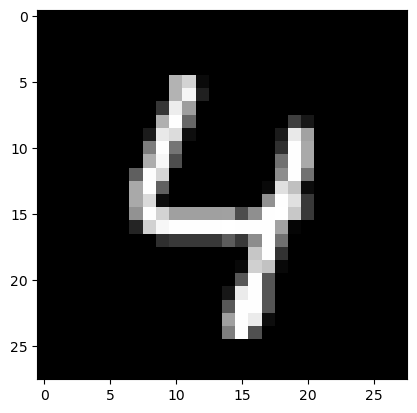

Prediction:  [2]
Label:  2


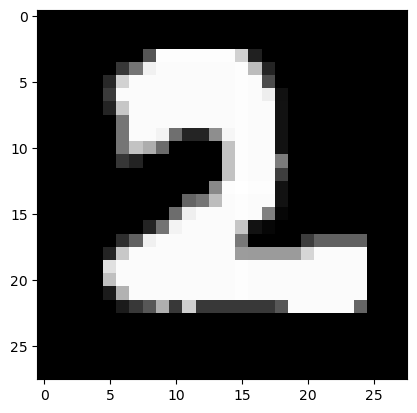

Prediction:  [4]
Label:  4


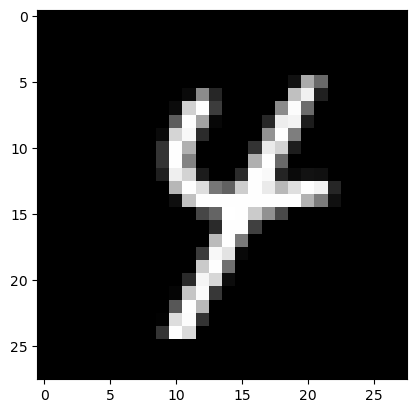

'\ntest_prediction(1, W1, b1, W2, b2)\ntest_prediction(2, W1, b1, W2, b2)\ntest_prediction(3, W1, b1, W2, b2)\n'

In [23]:
for i in range(100):
    test_prediction(i, W1, b1, W2, b2)
'''
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
'''

In [22]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 1 1 9 7 2 4 8 4 8 3 2 4 3 4 0 0 7 1 0 4 8 7 3 7 3 1 3 8 0 8 7 8 9 9 8 4
 1 6 4 7 1 6 7 2 2 6 7 7 5 4 2 8 8 5 2 4 9 3 3 7 6 6 9 6 6 2 5 7 7 8 5 8 1
 8 4 7 5 8 0 4 5 1 3 4 4 9 3 0 1 4 1 0 9 1 0 9 5 3 6 6 2 0 0 8 9 6 9 5 9 9
 1 2 4 5 4 3 1 6 6 8 6 9 3 8 6 8 0 5 0 4 7 3 5 5 4 2 4 0 1 3 0 6 6 7 6 2 4
 9 8 2 7 7 7 9 1 9 8 8 8 9 6 5 4 2 5 0 9 8 0 4 8 7 2 0 8 8 9 6 0 6 0 8 7 9
 9 9 0 3 7 3 0 1 0 1 2 9 5 1 1 4 0 9 0 1 0 3 0 6 0 3 0 4 1 3 1 8 8 2 2 5 5
 5 4 5 2 3 5 4 2 7 0 4 3 7 1 3 2 0 4 8 1 3 2 6 5 8 8 3 3 8 3 8 7 0 9 0 9 2
 5 4 4 3 3 3 7 6 3 7 4 7 1 4 2 4 2 7 0 7 7 7 0 2 2 3 1 1 9 2 1 7 9 4 6 7 5
 3 5 3 8 3 1 7 3 6 6 1 6 1 6 6 8 2 9 9 2 6 2 7 2 8 1 3 3 6 0 2 6 4 6 3 4 3
 0 7 0 9 4 5 5 2 9 8 4 2 5 0 0 7 2 7 0 7 1 6 4 9 0 7 5 6 0 5 3 4 5 0 5 9 2
 7 0 8 4 8 8 4 2 9 8 3 0 1 2 4 6 8 6 0 5 4 5 4 4 1 5 3 0 0 8 2 8 3 5 1 4 7
 1 1 4 5 5 2 5 0 9 9 2 3 6 0 8 9 1 1 4 9 4 6 1 6 9 6 4 3 9 4 6 6 1 7 3 9 5
 5 2 6 9 6 0 2 8 7 2 6 4 9 4 6 9 1 3 4 7 3 7 1 6 9 1 2 6 6 2 6 6 0 6 4 7 5
 7 4 3 7 4 8 1 4 8 6 1 2 

0.86